In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [125]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [126]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [127]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642741 entries, 0 to 1642740
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1642741 non-null  int64  
 1   kWh       1642741 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 25.1 MB


In [128]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1642736    0.14
1642737    0.14
1642738    0.14
1642739    0.14
1642740    0.14
Name: kWh, Length: 1642741, dtype: float64

In [129]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1642736    0.14
1642737    0.14
1642738    0.14
1642739    0.14
1642740    0.14
Name: kWh, Length: 1642741, dtype: float64

In [130]:
l=len(conso_data)-1
l

1642740

In [131]:
conso_data['sec']=conso_data['Interval']/1000


In [132]:
conso_data['Wh']=3600000/conso_data['Interval']


In [133]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [134]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642741 entries, 0 to 1642740
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1642741 non-null  int64  
 1   kWh        1642741 non-null  float64
 2   sec        1642741 non-null  float64
 3   Wh         1642741 non-null  float64
 4   cumul(ms)  1642741 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 62.7 MB


In [135]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1642736,25358,0.14,25.358,141.967032,40595175426
1642737,25989,0.14,25.989,138.520143,40595201415
1642738,25935,0.14,25.935,138.808560,40595227350
1642739,26033,0.14,26.033,138.286022,40595253383
1642740,26656,0.14,26.656,135.054022,40595280039


In [136]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

40595280039000

In [137]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 18, 3, 992933)

In [138]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [139]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [140]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [141]:
conso_data['dates']

0         2023-08-21 19:18:25.926933
1         2023-08-21 19:18:47.784933
2         2023-08-21 19:19:09.785933
3         2023-08-21 19:19:31.713933
4         2023-08-21 19:19:53.604933
                     ...            
1642736   2024-12-03 15:44:19.418933
1642737   2024-12-03 15:44:45.407933
1642738   2024-12-03 15:45:11.342933
1642739   2024-12-03 15:45:37.375933
1642740   2024-12-03 15:46:04.031933
Name: dates, Length: 1642741, dtype: datetime64[ns]

## créer les dates

In [142]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:18:25.926933,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:47.784933,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:19:09.785933,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:19:31.713933,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:19:53.604933,21/08/23
...,...,...,...,...,...,...,...
1642736,25358,0.14,25.358,141.967032,40595175426,2024-12-03 15:44:19.418933,03/12/24
1642737,25989,0.14,25.989,138.520143,40595201415,2024-12-03 15:44:45.407933,03/12/24
1642738,25935,0.14,25.935,138.808560,40595227350,2024-12-03 15:45:11.342933,03/12/24
1642739,26033,0.14,26.033,138.286022,40595253383,2024-12-03 15:45:37.375933,03/12/24


### save conso_data with dates

In [143]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [144]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('03/12/24', 3, 12, 2024)

In [145]:
here = now.strftime('%H:%M:%S')
here

'15:46:32'

In [146]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [147]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 1640911 to 1642740
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1830 non-null   int64         
 1   kWh        1830 non-null   float64       
 2   sec        1830 non-null   float64       
 3   Wh         1830 non-null   float64       
 4   cumul(ms)  1830 non-null   int64         
 5   dates      1830 non-null   datetime64[ns]
 6   days       1830 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 114.4+ KB


In [148]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [149]:
data = list(df_grp['kWh'])
print(data)

[0.81, 3.7, 4.225, 3.68, 4.184, 4.593, 3.536, 3.425, 3.512, 3.691, 3.744, 3.822, 4.25, 3.783, 3.494, 3.631, 3.324, 3.383, 4.273, 4.009, 4.043, 3.934, 3.449, 4.439, 3.759, 3.761, 4.309, 4.715, 3.829, 3.223, 3.178, 3.985, 3.687, 3.154, 3.787, 4.133, 3.774, 3.581, 4.765, 4.2, 4.534, 3.779, 3.409, 4.308, 3.878, 3.854, 3.444, 4.078, 3.658, 3.399, 4.14, 3.383, 3.88, 3.837, 3.636, 3.76, 4.248, 3.297, 3.877, 2.99, 2.055, 2.042, 2.442, 4.085, 3.72, 4.328, 3.614, 3.93, 3.742, 3.896, 4.006, 4.108, 3.658, 3.153, 3.805, 3.506, 3.628, 3.667, 3.721, 3.249, 3.859, 3.252, 3.795, 3.614, 4.075, 3.565, 3.387, 3.815, 4.062, 4.332, 4.136, 3.998, 4.237, 3.742, 3.928, 3.859, 3.915, 3.735, 4.052, 4.347, 3.885, 3.505, 3.682, 3.668, 3.347, 3.843, 4.004, 4.1, 3.478, 4.175, 3.598, 4.059, 4.552, 3.676, 3.44, 3.579, 4.147, 3.703, 4.094, 3.98, 3.747, 3.59, 5.125, 3.704, 3.765, 4.284, 4.11, 4.688, 4.41, 4.002, 3.758, 4.308, 4.747, 4.185, 4.795, 4.313, 3.733, 4.169, 3.698, 3.664, 3.531, 3.928, 3.687, 3.784, 3.581, 3.48

In [150]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [151]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [152]:
df = conso_data
len(df)

1642741

In [153]:
period(p=2)

2023-08-22 01:24:39.729933	2023-08-22 08:28:55.349933	7h 4m 15s 	2000


In [154]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.293843
dtype: float64

In [155]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.487773
dtype: float64

In [156]:
last=df_grp.iloc[-1]['kWh']
last

1.83

In [157]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 1640911 to 1642740
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1830 non-null   int64         
 1   kWh        1830 non-null   float64       
 2   sec        1830 non-null   float64       
 3   Wh         1830 non-null   float64       
 4   cumul(ms)  1830 non-null   int64         
 5   dates      1830 non-null   datetime64[ns]
 6   days       1830 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 114.4+ KB


In [158]:
# select day
day = today
#day = '16/08/24'


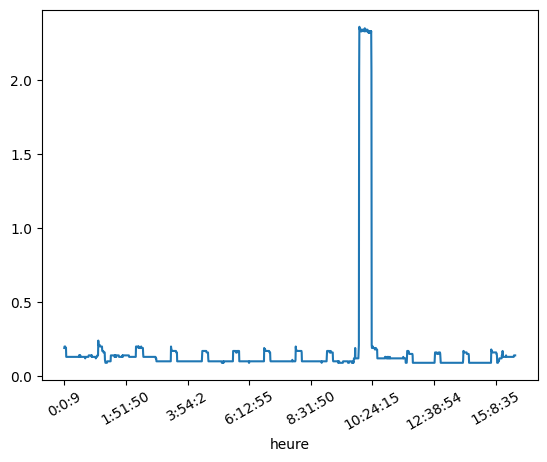

In [159]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [160]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:18:25.926933,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:47.784933,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:19:09.785933,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:19:31.713933,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:19:53.604933,21/08/23
...,...,...,...,...,...,...,...
1642736,25358,0.14,25.358,141.967032,40595175426,2024-12-03 15:44:19.418933,03/12/24
1642737,25989,0.14,25.989,138.520143,40595201415,2024-12-03 15:44:45.407933,03/12/24
1642738,25935,0.14,25.935,138.808560,40595227350,2024-12-03 15:45:11.342933,03/12/24
1642739,26033,0.14,26.033,138.286022,40595253383,2024-12-03 15:45:37.375933,03/12/24


In [161]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:9,18893,0.19,18.893,190.546763,40538525826,2024-12-03 00:00:09.818933,03/12/24
0:0:27,17852,0.20,17.852,201.658078,40538543678,2024-12-03 00:00:27.670933,03/12/24
0:0:45,17959,0.20,17.959,200.456596,40538561637,2024-12-03 00:00:45.629933,03/12/24
0:1:3,18022,0.20,18.022,199.755854,40538579659,2024-12-03 00:01:03.651933,03/12/24
0:1:21,18204,0.20,18.204,197.758734,40538597863,2024-12-03 00:01:21.855933,03/12/24
...,...,...,...,...,...,...,...
15:44:19,25358,0.14,25.358,141.967032,40595175426,2024-12-03 15:44:19.418933,03/12/24
15:44:45,25989,0.14,25.989,138.520143,40595201415,2024-12-03 15:44:45.407933,03/12/24
15:45:11,25935,0.14,25.935,138.808560,40595227350,2024-12-03 15:45:11.342933,03/12/24


In [162]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.569
Min : 18/11/24 3.155


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1640911,18893,0.19,18.893,190.546763,40538525826,2024-12-03 00:00:09.818933,03/12/24,0:0:9
1640912,17852,0.20,17.852,201.658078,40538543678,2024-12-03 00:00:27.670933,03/12/24,0:0:27
1640913,17959,0.20,17.959,200.456596,40538561637,2024-12-03 00:00:45.629933,03/12/24,0:0:45
1640914,18022,0.20,18.022,199.755854,40538579659,2024-12-03 00:01:03.651933,03/12/24,0:1:3
1640915,18204,0.20,18.204,197.758734,40538597863,2024-12-03 00:01:21.855933,03/12/24,0:1:21
...,...,...,...,...,...,...,...,...
1642736,25358,0.14,25.358,141.967032,40595175426,2024-12-03 15:44:19.418933,03/12/24,15:44:19
1642737,25989,0.14,25.989,138.520143,40595201415,2024-12-03 15:44:45.407933,03/12/24,15:44:45
1642738,25935,0.14,25.935,138.808560,40595227350,2024-12-03 15:45:11.342933,03/12/24,15:45:11
1642739,26033,0.14,26.033,138.286022,40595253383,2024-12-03 15:45:37.375933,03/12/24,15:45:37


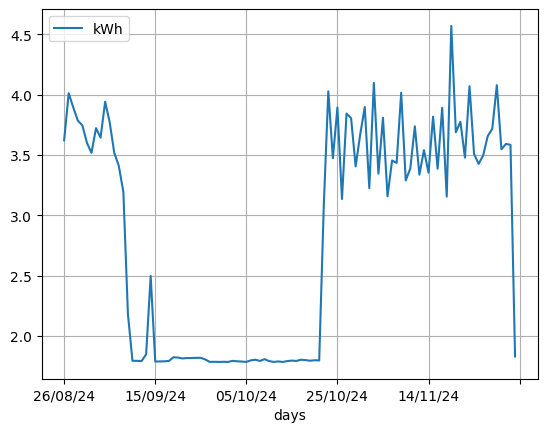

In [163]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-12-03 00:00:09.818933	2024-12-03 08:31:13.315933	8h 31m 3s 	1000
2024-12-03 08:31:13.315933	2024-12-03 15:46:04.031933	7h 14m 50s 	830
<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 1640911 to 1642740
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1830 non-null   int64         
 1   kWh        1830 non-null   float64       
 2   sec        1830 non-null   float64       
 3   Wh         1830 non-null   float64       
 4   cumul(ms)  1830 non-null   int64         
 5   dates      1830 non-null   datetime64[ns]
 6   days       1830 non-null   object        
 7   heure      1830 non-null   object        
 8   hours      1830 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 143.0+ KB


('03/12/24', <Axes: xlabel='hours'>)

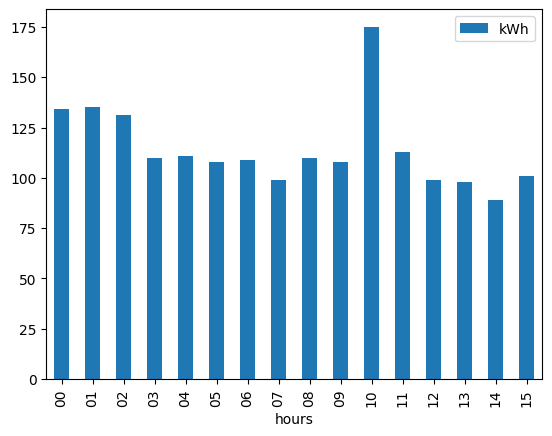

In [164]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [165]:
df_grp

,kWh
days,
21/08/23,0.810
22/08/23,3.700
23/08/23,4.225
24/08/23,3.680
25/08/23,4.184
...,...
29/11/24,4.078
30/11/24,3.547
01/12/24,3.591


In [166]:
# select number of days to display
span = 30
#df_grp.tail(span)


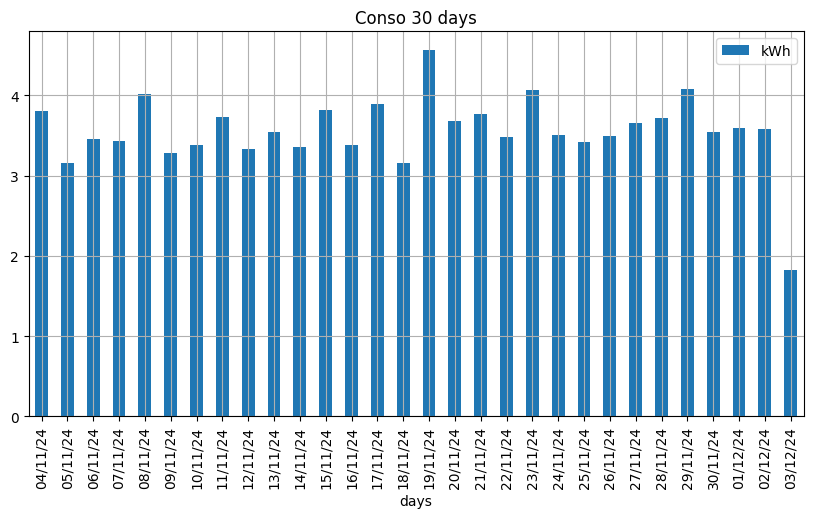

In [167]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


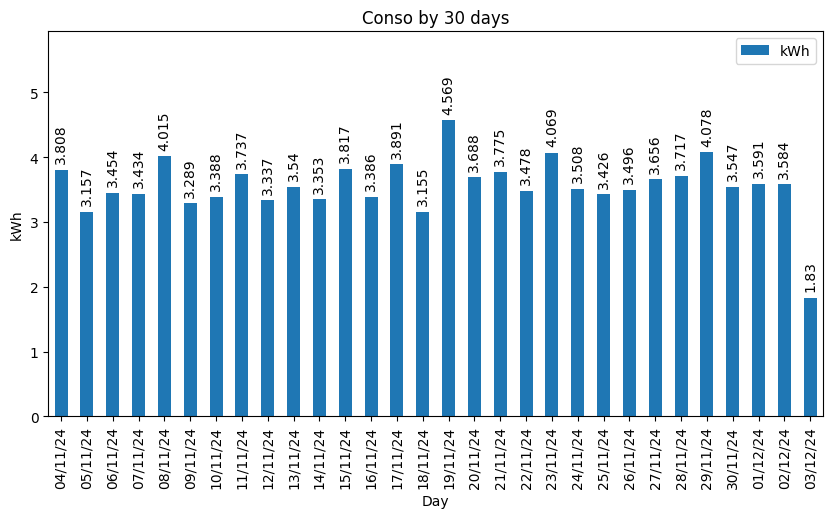

In [168]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [169]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
04/11/24    3.808
05/11/24    3.157
06/11/24    3.454
07/11/24    3.434
08/11/24    4.015
09/11/24    3.289
10/11/24    3.388
11/11/24    3.737
12/11/24    3.337
13/11/24    3.540
14/11/24    3.353
15/11/24    3.817
16/11/24    3.386
17/11/24    3.891
18/11/24    3.155
19/11/24    4.569
20/11/24    3.688
21/11/24    3.775
22/11/24    3.478
23/11/24    4.069
24/11/24    3.508
25/11/24    3.426
26/11/24    3.496
27/11/24    3.656
28/11/24    3.717
29/11/24    4.078
30/11/24    3.547
01/12/24    3.591
02/12/24    3.584
03/12/24    1.830
Name: kWh, dtype: float64

In [170]:
x_labels=df_grp.tail(span).index
x_labels

Index(['04/11/24', '05/11/24', '06/11/24', '07/11/24', '08/11/24', '09/11/24',
       '10/11/24', '11/11/24', '12/11/24', '13/11/24', '14/11/24', '15/11/24',
       '16/11/24', '17/11/24', '18/11/24', '19/11/24', '20/11/24', '21/11/24',
       '22/11/24', '23/11/24', '24/11/24', '25/11/24', '26/11/24', '27/11/24',
       '28/11/24', '29/11/24', '30/11/24', '01/12/24', '02/12/24', '03/12/24'],
      dtype='object', name='days')

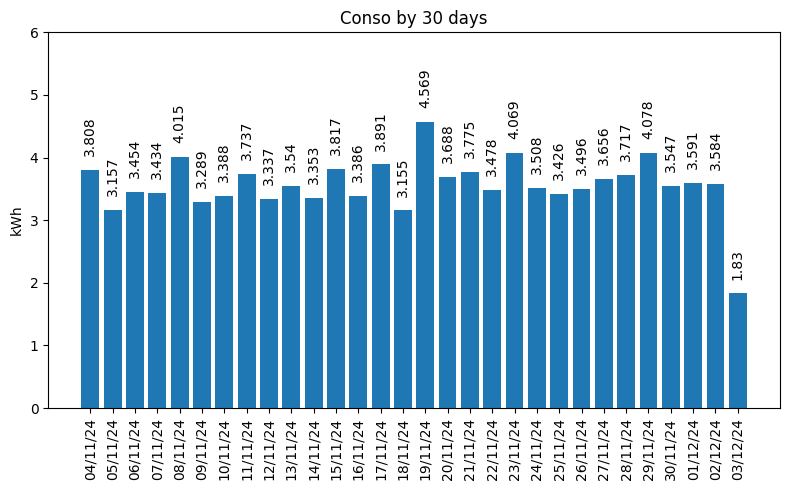

In [171]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [172]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

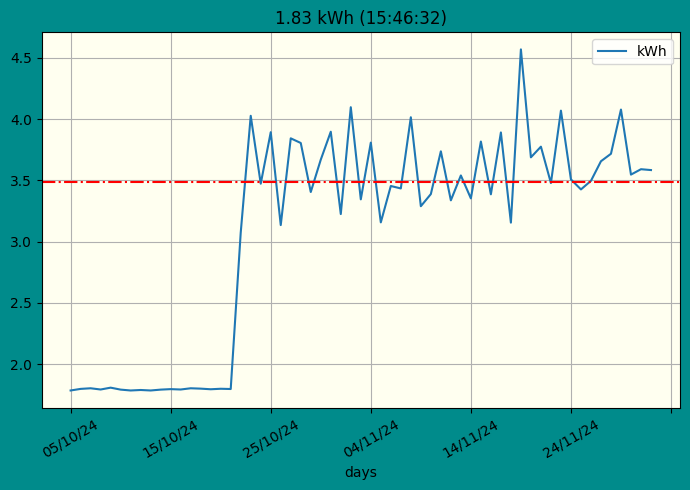

In [173]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

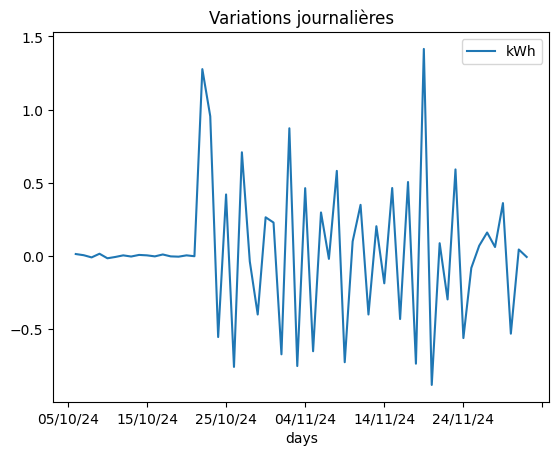

In [174]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [175]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:18:25.926933,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:47.784933,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:19:09.785933,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:19:31.713933,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:19:53.604933,21/08/23,19
...,...,...,...,...,...,...,...,...
1642736,25358,0.14,25.358,141.967032,40595175426,2024-12-03 15:44:19.418933,03/12/24,15
1642737,25989,0.14,25.989,138.520143,40595201415,2024-12-03 15:44:45.407933,03/12/24,15
1642738,25935,0.14,25.935,138.808560,40595227350,2024-12-03 15:45:11.342933,03/12/24,15
1642739,26033,0.14,26.033,138.286022,40595253383,2024-12-03 15:45:37.375933,03/12/24,15


In [176]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [177]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [178]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [179]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,810
22/08/23,3700
23/08/23,4225
24/08/23,3680
25/08/23,4184
...,...
29/11/24,4078
30/11/24,3547
01/12/24,3591


In [181]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:18:25.926933,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:47.784933,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:19:09.785933,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:19:31.713933,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:19:53.604933,21/08/23,19
...,...,...,...,...,...,...,...,...
1642736,25358,0.14,25.358,141.967032,40595175426,2024-12-03 15:44:19.418933,03/12/24,15
1642737,25989,0.14,25.989,138.520143,40595201415,2024-12-03 15:44:45.407933,03/12/24,15
1642738,25935,0.14,25.935,138.808560,40595227350,2024-12-03 15:45:11.342933,03/12/24,15
1642739,26033,0.14,26.033,138.286022,40595253383,2024-12-03 15:45:37.375933,03/12/24,15


In [182]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
03/12/24 15    1642736  03/12/24    15  0.14
               1642737  03/12/24    15  0.14
               1642738  03/12/24    15  0.14
               1642739  03/12/24    15  0.14
               1642740  03/12/24    15  0.14

[1642741 rows x 3 columns]

In [183]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [184]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [185]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,810,810
22/08/23,3700,3700
23/08/23,4225,4225
24/08/23,3680,3680
25/08/23,4184,4184
...,...,...
29/11/24,4078,4078
30/11/24,3547,3547
01/12/24,3591,3591


In [186]:
grp_by_day['kWh'].cumsum()

days
21/08/23        810
22/08/23       4510
23/08/23       8735
24/08/23      12415
25/08/23      16599
             ...   
29/11/24    1630189
30/11/24    1633736
01/12/24    1637327
02/12/24    1640911
03/12/24    1642741
Name: kWh, Length: 471, dtype: int64

In [187]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     129
         20     279
         21     142
         22     130
         23     130
...             ...
03/12/24 11     113
         12      99
         13      98
         14      89
         15     101

[11277 rows x 1 columns]

In [188]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19           129
          20           408
          21           550
          22           680
          23           810
                    ...   
03/12/24  11       1642354
          12       1642453
          13       1642551
          14       1642640
          15       1642741
Name: kWh, Length: 11277, dtype: int64

In [189]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     129     129    NaN
         20     279     408  150.0
         21     142     550 -137.0
         22     130     680  -12.0
         23     130     810    0.0
...             ...     ...    ...
03/12/24 11     113    1443  -62.0
         12      99    1542  -14.0
         13      98    1640   -1.0
         14      89    1729   -9.0
         15     101    1830   12.0

[11277 rows x 3 columns]

In [190]:
today, grp_by_dayhours.loc[today]

('03/12/24',
        kWh  cumsum  diff
 hours                   
 00     134     134   NaN
 01     135     269   1.0
 02     131     400  -4.0
 03     110     510 -21.0
 04     111     621   1.0
 05     108     729  -3.0
 06     109     838   1.0
 07      99     937 -10.0
 08     110    1047  11.0
 09     108    1155  -2.0
 10     175    1330  67.0
 11     113    1443 -62.0
 12      99    1542 -14.0
 13      98    1640  -1.0
 14      89    1729  -9.0
 15     101    1830  12.0)

Text(0.5, 1.0, 'Cumul journalier')

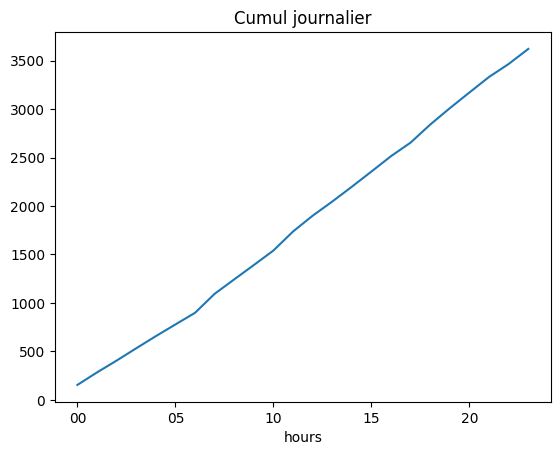

In [191]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

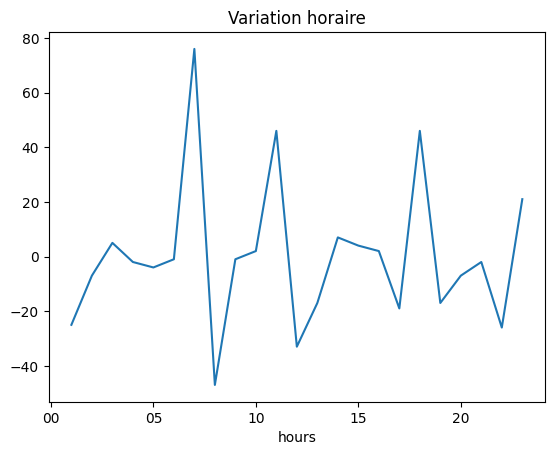

In [192]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [193]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

471

In [194]:
df_grp.tail(n)['kWh'].describe()


count    471.000000
mean       3.487773
std        0.700526
min        0.810000
25%        3.348000
50%        3.615000
75%        3.872500
max        5.125000
Name: kWh, dtype: float64

In [195]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '471 days')

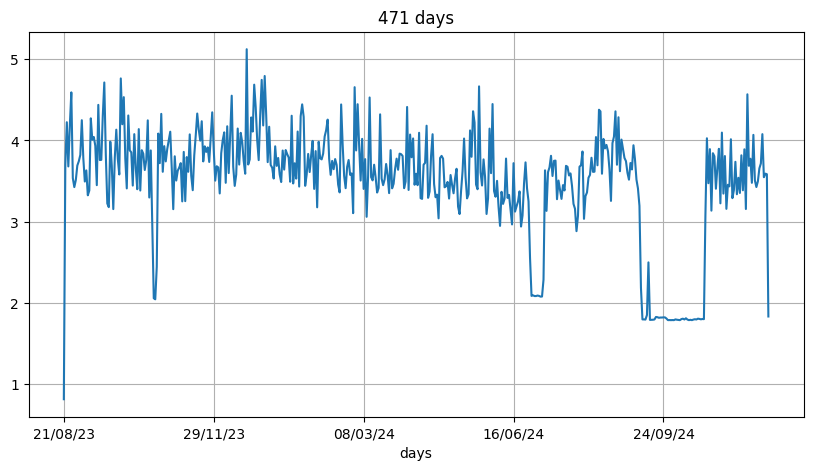

In [196]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

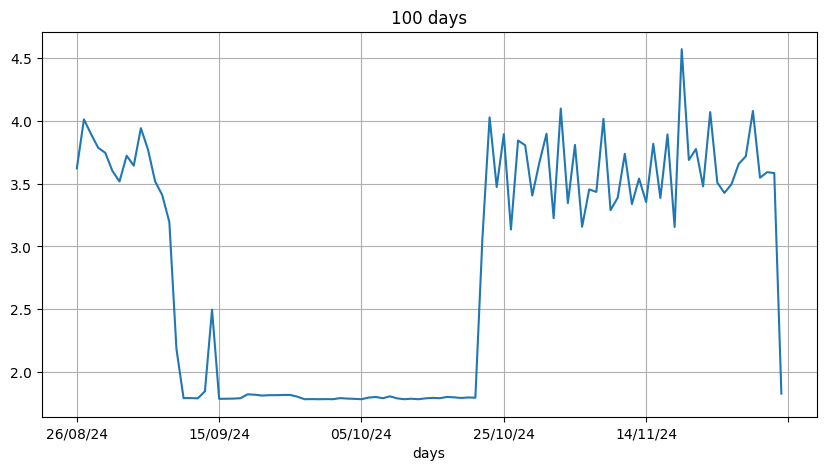

In [197]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [198]:
df_grp['kWh']

days
21/08/23    0.810
22/08/23    3.700
23/08/23    4.225
24/08/23    3.680
25/08/23    4.184
            ...  
29/11/24    4.078
30/11/24    3.547
01/12/24    3.591
02/12/24    3.584
03/12/24    1.830
Name: kWh, Length: 471, dtype: float64

In [199]:
df_grp.describe()

,kWh
count,471.000000
mean,3.487773
std,0.700526
min,0.810000
25%,3.348000
50%,3.615000
75%,3.872500
max,5.125000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

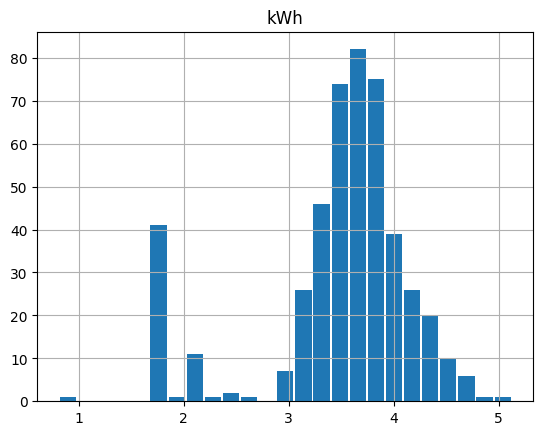

In [200]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [201]:
df_grp.tail(span)['kWh']

days
26/08/24    3.621
27/08/24    4.011
28/08/24    3.894
29/08/24    3.785
30/08/24    3.745
            ...  
29/11/24    4.078
30/11/24    3.547
01/12/24    3.591
02/12/24    3.584
03/12/24    1.830
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [202]:
day

'03/12/24'

In [203]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,134,134,NaN
01,135,269,1.0
02,131,400,-4.0
03,110,510,-21.0
04,111,621,1.0
05,108,729,-3.0
06,109,838,1.0
07,99,937,-10.0
08,110,1047,11.0


In [204]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


16

In [205]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 17)

In [206]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [207]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

In [208]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
Name: days, dtype: float64

In [209]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [210]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 00 to 15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     16 non-null     int64  
 1   cumsum  16 non-null     int64  
 2   diff    15 non-null     float64
 3   days    16 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 640.0+ bytes


In [211]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
Name: days, dtype: float64

In [212]:
day

'03/12/24'

In [213]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,134,134,NaN,1.0
01,135,269,1.0,2.0
02,131,400,-4.0,3.0
03,110,510,-21.0,4.0
04,111,621,1.0,5.0
05,108,729,-3.0,6.0
06,109,838,1.0,7.0
07,99,937,-10.0,8.0
08,110,1047,11.0,9.0


Text(0.5, 1.0, '03/12/24')

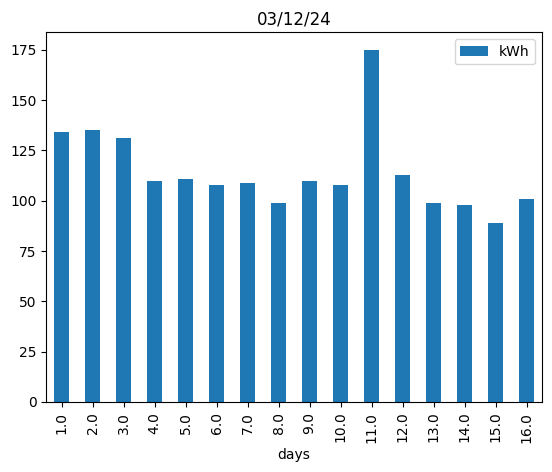

In [214]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [215]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15'],
      dtype='object', name='hours')

# Conso du jour


In [216]:
groupedbyhour.count()

,kWh
hours,
00,134
01,135
02,131
03,110
04,111
05,108
06,109
07,99
08,110


In [217]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    166
01    152
02    170
03    155
04    158
05    142
06    115
07    131
08    128
09    116
10    131
11    114
12    132
13    203
14    140
15    156
16    987
17    202
18    279
19    301
20    311
21    320
22    227
23    189
Name: kWh, dtype: int64

In [218]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

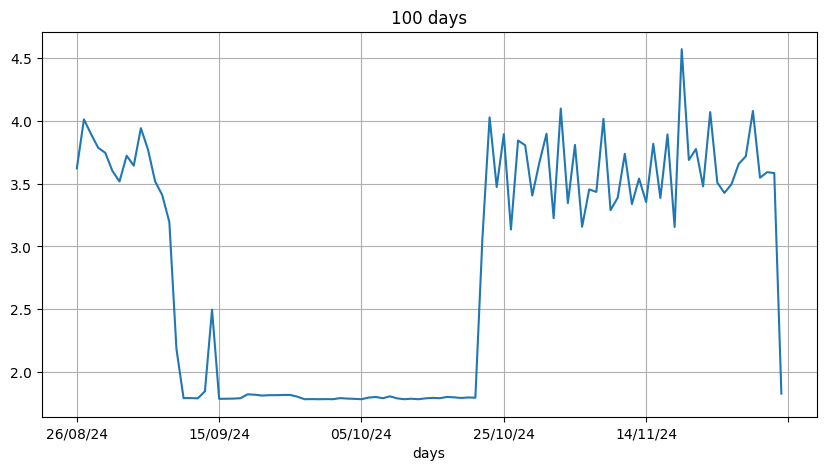

In [219]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [220]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

74.76877212524414


# Today

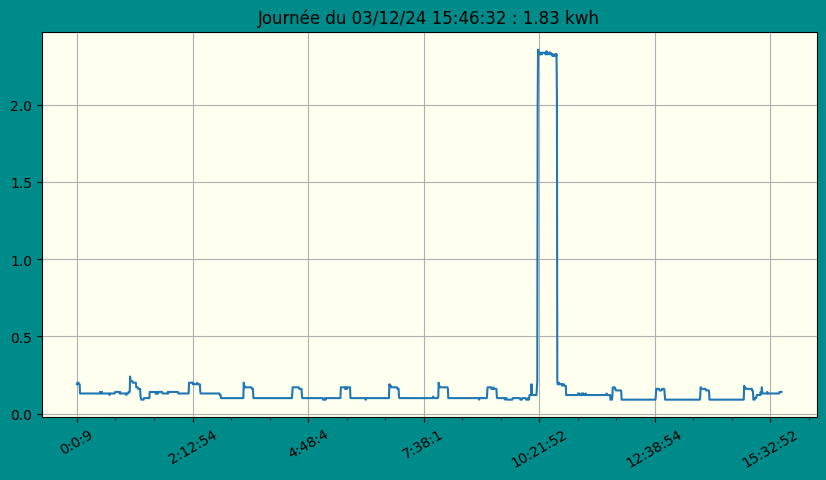

In [221]:
show(today,bgcolor='ivory')

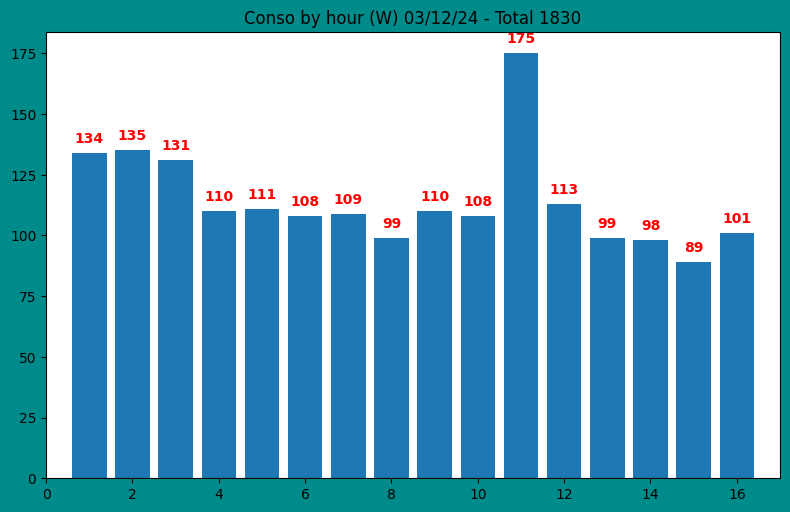

In [222]:
conso_by_hour(today)

In [223]:
day = '21/11/24'

('21/11/24', None)

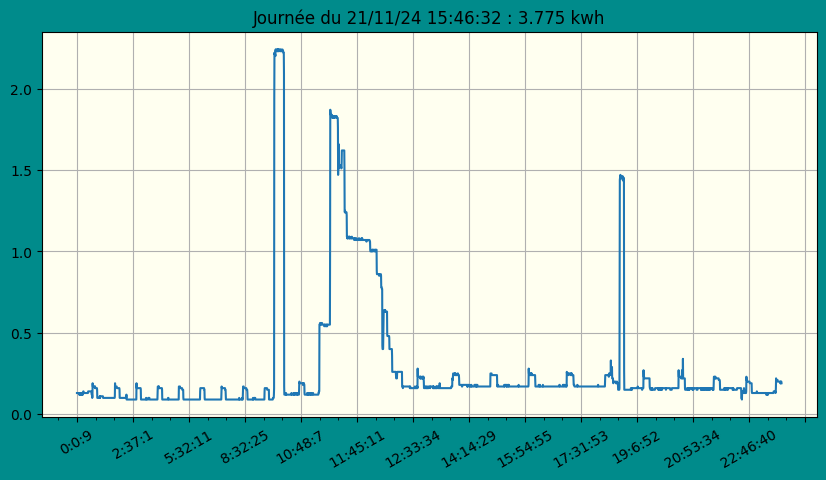

In [224]:
day, show(day,bgcolor='ivory')

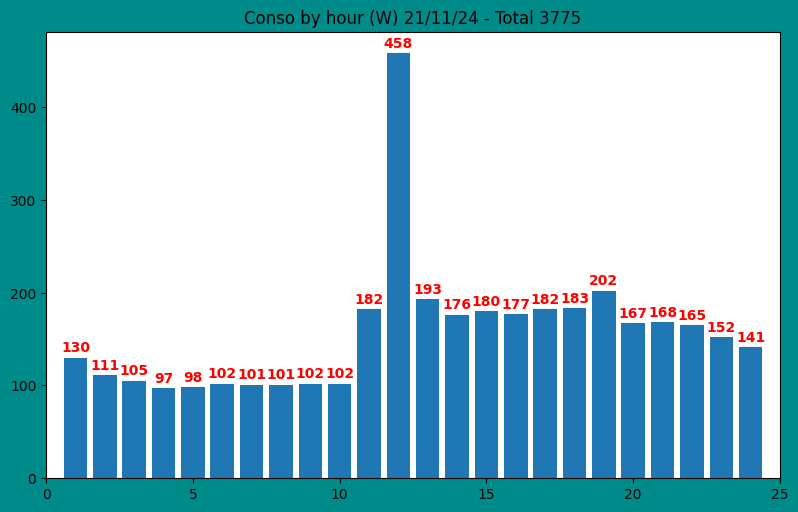

In [225]:
conso_by_hour(day)

('21/12/23', None)

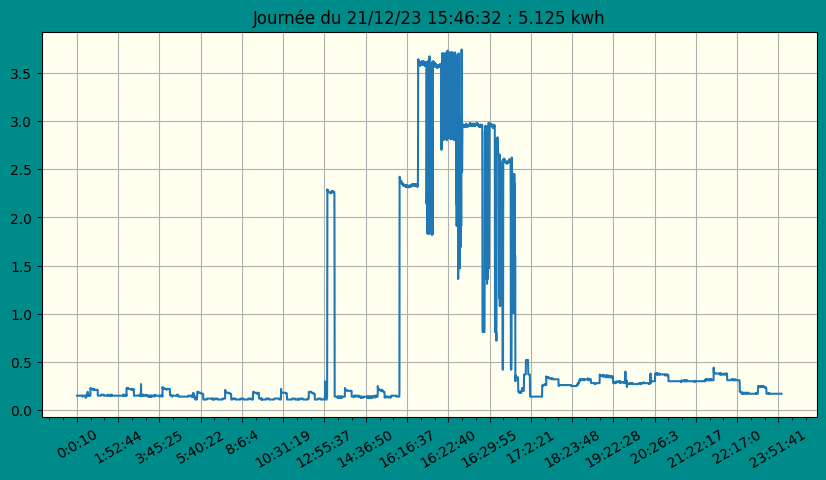

In [226]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

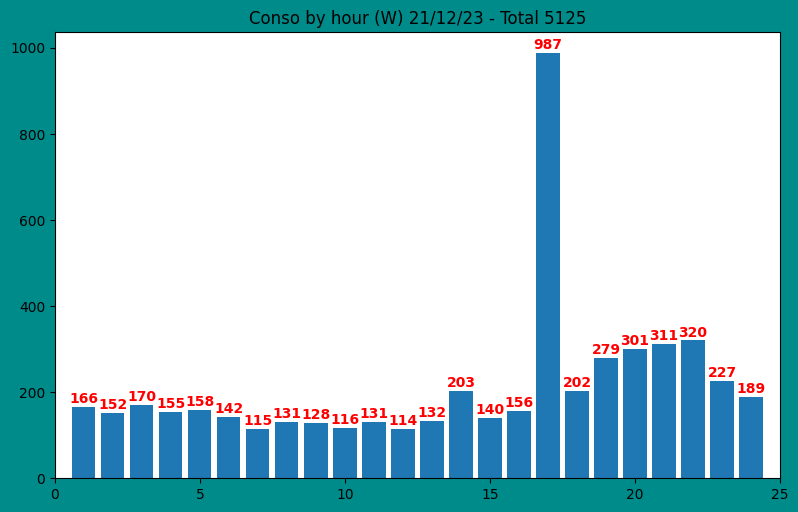

In [227]:
conso_by_hour(day)

In [228]:
sum(data)

5125

In [229]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,134,134,NaN,1.0
01,135,269,1.0,2.0
02,131,400,-4.0,3.0
03,110,510,-21.0,4.0
04,111,621,1.0,5.0
05,108,729,-3.0,6.0
06,109,838,1.0,7.0
07,99,937,-10.0,8.0
08,110,1047,11.0,9.0


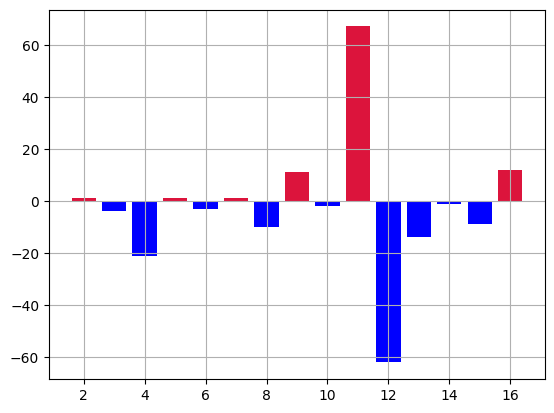

In [230]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [231]:
data

hours
00    166
01    152
02    170
03    155
04    158
05    142
06    115
07    131
08    128
09    116
10    131
11    114
12    132
13    203
14    140
15    156
16    987
17    202
18    279
19    301
20    311
21    320
22    227
23    189
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

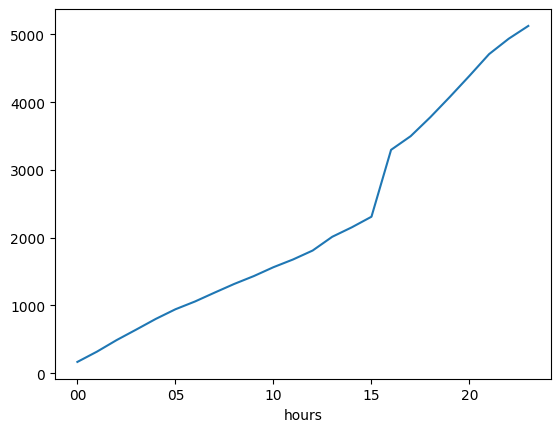

In [232]:
data.cumsum().plot()


<Axes: xlabel='hours'>

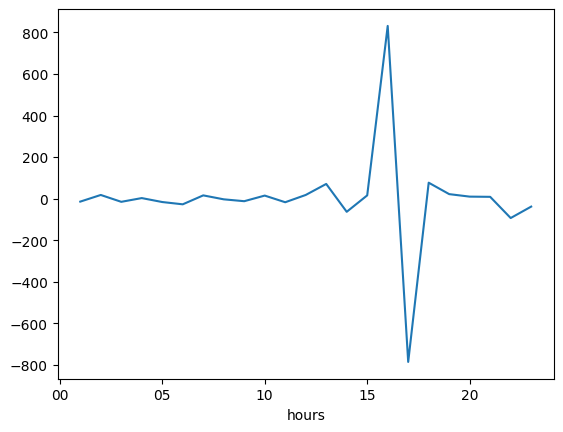

In [233]:
# evolution par heure
data.diff().plot()

In [234]:
data.diff().describe()

count     23.000000
mean       1.000000
std      246.401557
min     -785.000000
25%      -16.500000
50%        3.000000
75%       17.000000
max      831.000000
Name: kWh, dtype: float64

<Axes: >

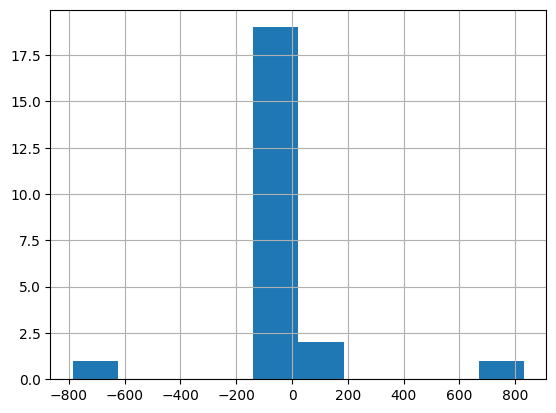

In [235]:
data.diff().hist()

# Test sauvegarde

In [236]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [237]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [238]:
#conso_byhour(day)

In [239]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


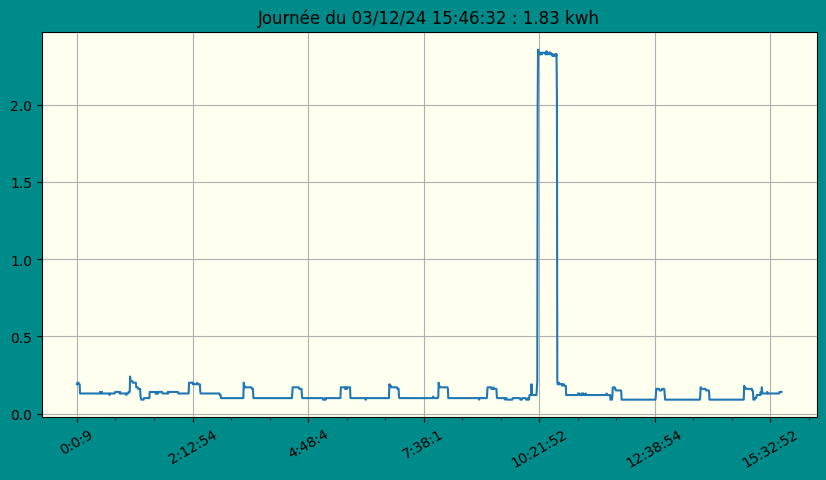

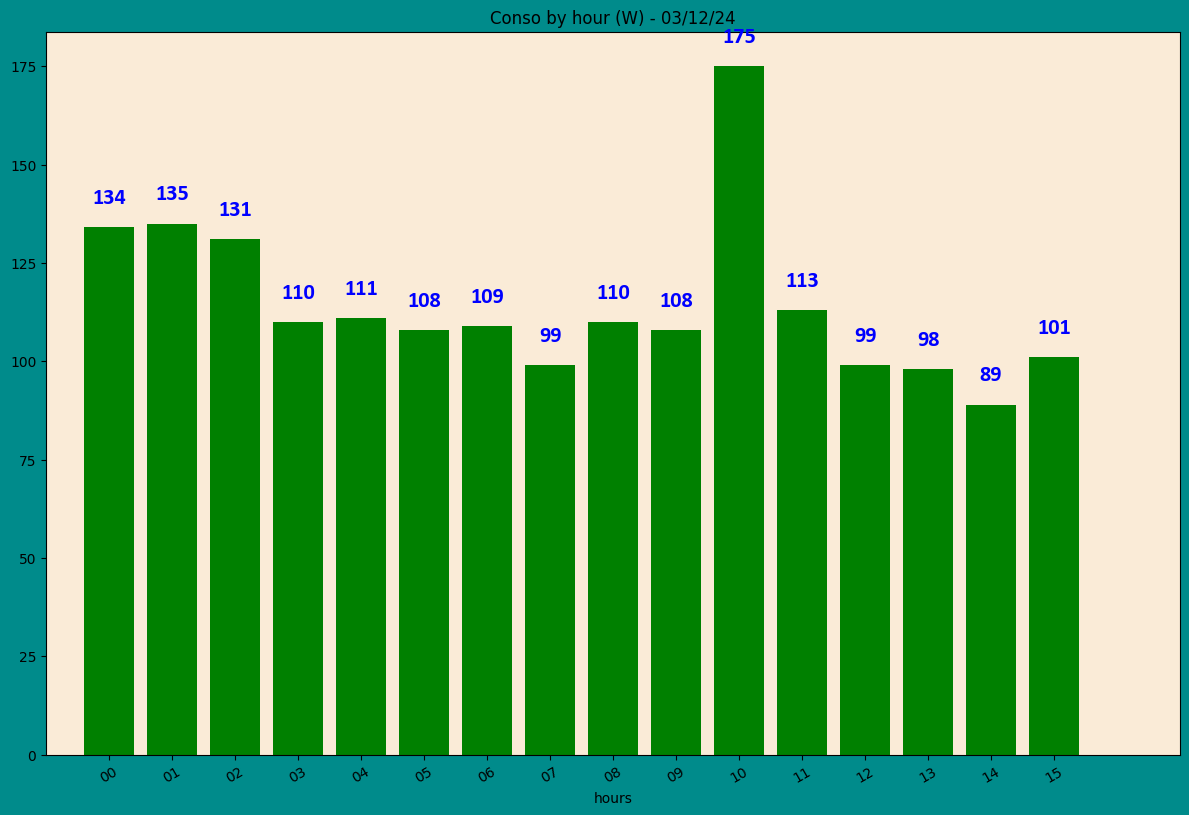

In [240]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [241]:
month.describe()


count    30.00000
mean      3.60960
std       0.30529
min       3.15500
25%       3.39750
50%       3.54350
75%       3.76550
max       4.56900
Name: kWh, dtype: float64

<Axes: >

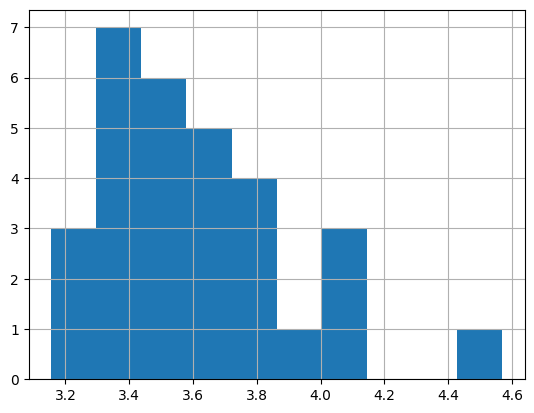

In [242]:
month.hist()

<Axes: xlabel='days'>

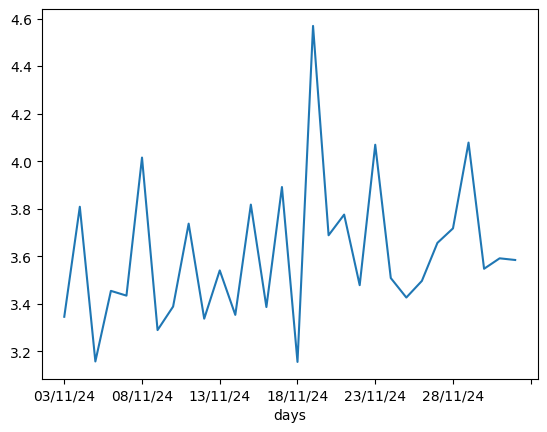

In [243]:
month.plot()

In [244]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [245]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

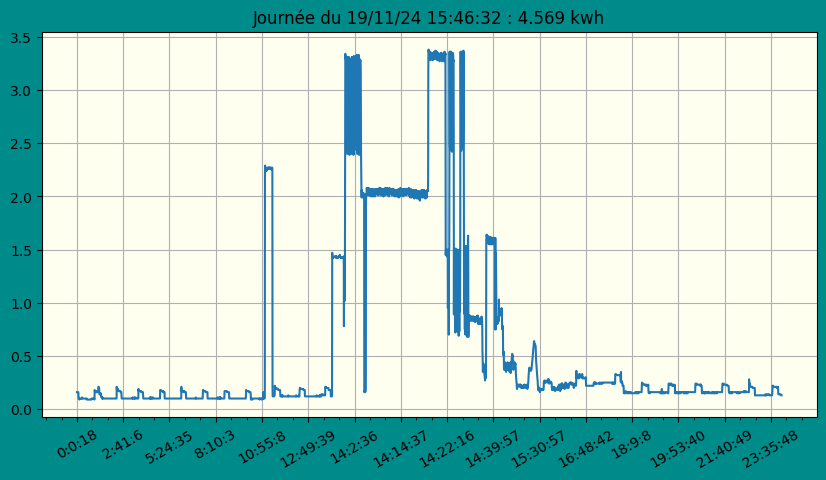

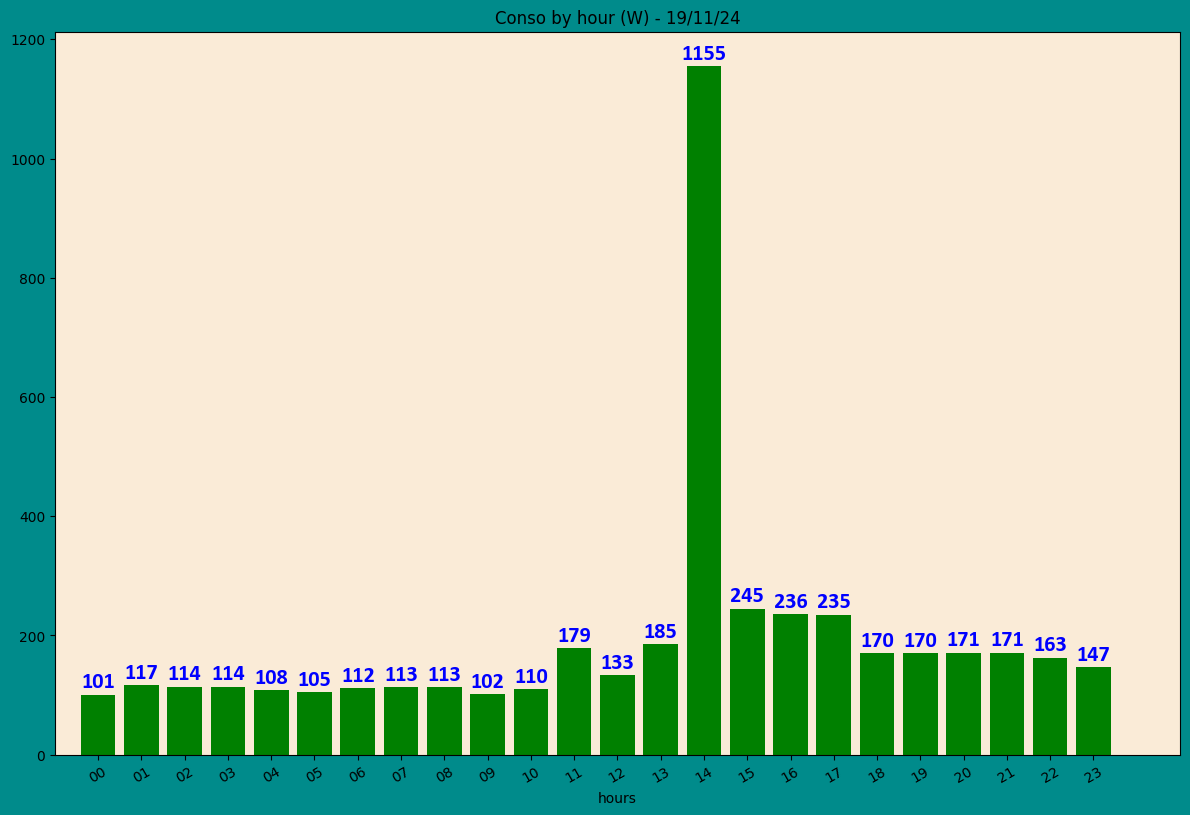

In [247]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [248]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19     129     129    NaN   NaN
         20     279     408  150.0   NaN
         21     142     550 -137.0   NaN
         22     130     680  -12.0   NaN
         23     130     810    0.0   NaN
...             ...     ...    ...   ...
03/12/24 11     113    1443  -62.0  12.0
         12      99    1542  -14.0  13.0
         13      98    1640   -1.0  14.0
         14      89    1729   -9.0  15.0
         15     101    1830   12.0  16.0

[11277 rows x 4 columns]

In [249]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,101,101,NaN,NaN
01,117,218,16.0,NaN
02,114,332,-3.0,NaN
03,114,446,0.0,NaN
04,108,554,-6.0,NaN
05,105,659,-3.0,NaN
06,112,771,7.0,NaN
07,113,884,1.0,NaN
08,113,997,0.0,NaN


In [250]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

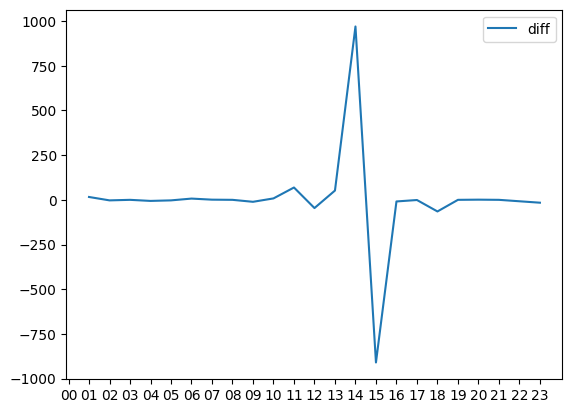

In [251]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

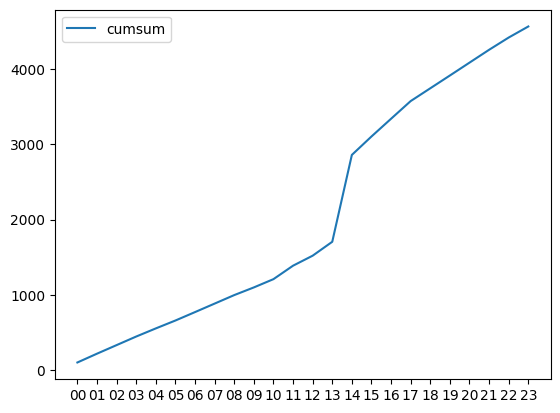

In [252]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [253]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB